In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.patches as patches
from shapely.geometry import Point, Polygon, LineString
from itertools import groupby
from matplotlib.lines import Line2D
from itertools import cycle, islice

In [2]:
orange_points = set()

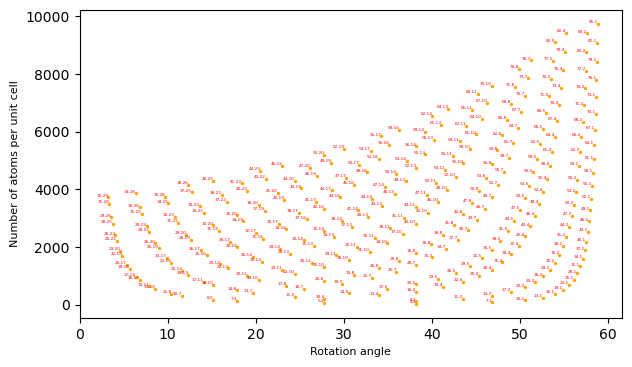

In [3]:
import matplotlib.pyplot as plt
import math
import numpy as np

fig, ax = plt.subplots(figsize=(7, 4))

for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    if N < 10000:
                        ax.scatter(np.degrees(alpha), N, s=2, label=f'{m},{n}',color = 'orange')
                        ax.text(np.degrees(alpha), N, f'{m},{n}', fontsize=3, ha='right', va='bottom', color='red')

ax.set_xticks([0, 10, 20, 30, 40, 50, 60])
ax.set_xlabel('Rotation angle', fontsize=8)
ax.set_ylabel('Number of atoms per unit cell', fontsize=8)

#plt.show()
plt.savefig('figure11.png', dpi=300, bbox_inches='tight')

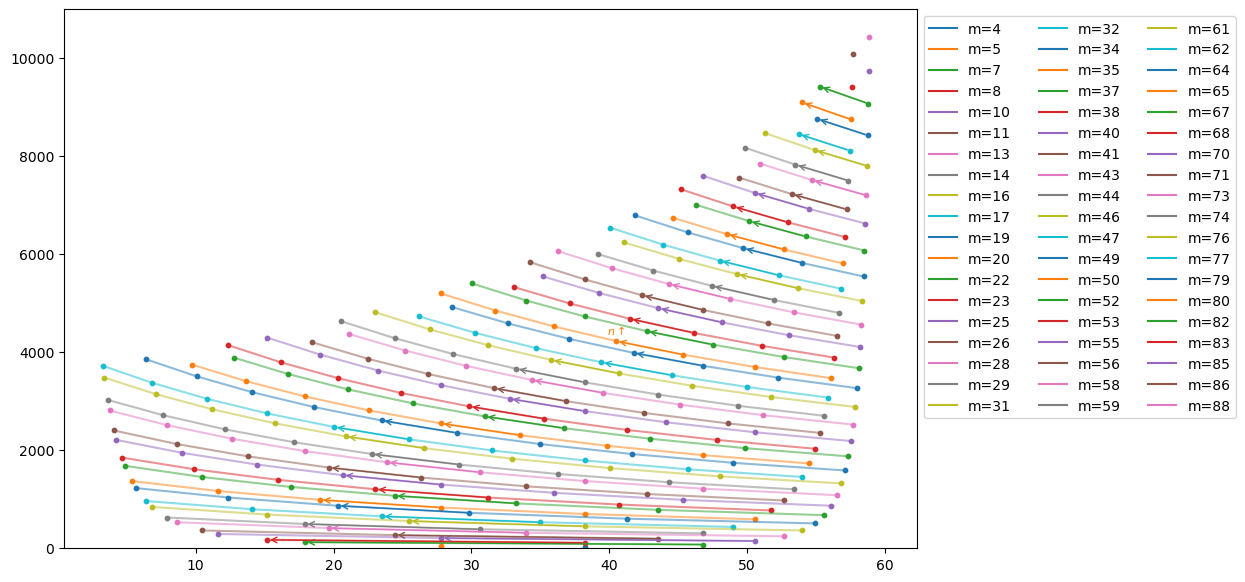

In [4]:
import matplotlib.pyplot as plt
import math
import numpy as np

fig, ax = plt.subplots(figsize=(11, 7))

# Store points for each unique m value
points_by_m = {}

for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)

            if abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    #ax.scatter(np.degrees(alpha), N, s=10, label=f'{m},{n}', color='orange', alpha=0.8)

                    if m not in points_by_m:
                        points_by_m[m] = {'alphas': [], 'N_values': []}

                    points_by_m[m]['alphas'].append(np.degrees(alpha))
                    points_by_m[m]['N_values'].append(N)

                    
# Connect points for each unique m value
for m, data in points_by_m.items():
    ax.scatter(data['alphas'], data['N_values'], s=10, label=f'm={m}')
    line = ax.plot(data['alphas'], data['N_values'], label=f'm={m}', alpha=0.5)[0]

    arrow_index = len(data['alphas']) // 2  # Change this to adjust arrow position
    ax.annotate('', xy=(data['alphas'][arrow_index], data['N_values'][arrow_index]),
                xytext=(data['alphas'][arrow_index - 1], data['N_values'][arrow_index - 1]),
                arrowprops=dict(arrowstyle='->', color=line.get_color(), lw=1))

    # Add a text annotation
    if  m == 50:  # Add 'm ↑' on top of one arrow
        ax.text(data['alphas'][arrow_index], data['N_values'][arrow_index] + 100, r'$n \uparrow$', 
                color=line.get_color(), ha='center', va='bottom', fontsize=8, weight='bold')

    
# Create custom legend handles for the lines
line_handles = [Line2D([0], [0], color=line.get_color(), label=line.get_label()) for line in ax.lines if int(line.get_label().split('=')[1]) <= 88]

ax.set_ylim(bottom=0, top=11000)  # Adjust the values according to your requirements

# Create the legend with custom handles
legend = ax.legend(handles=line_handles, loc='upper left', bbox_to_anchor=(1, 1), ncol=3)

plt.show()

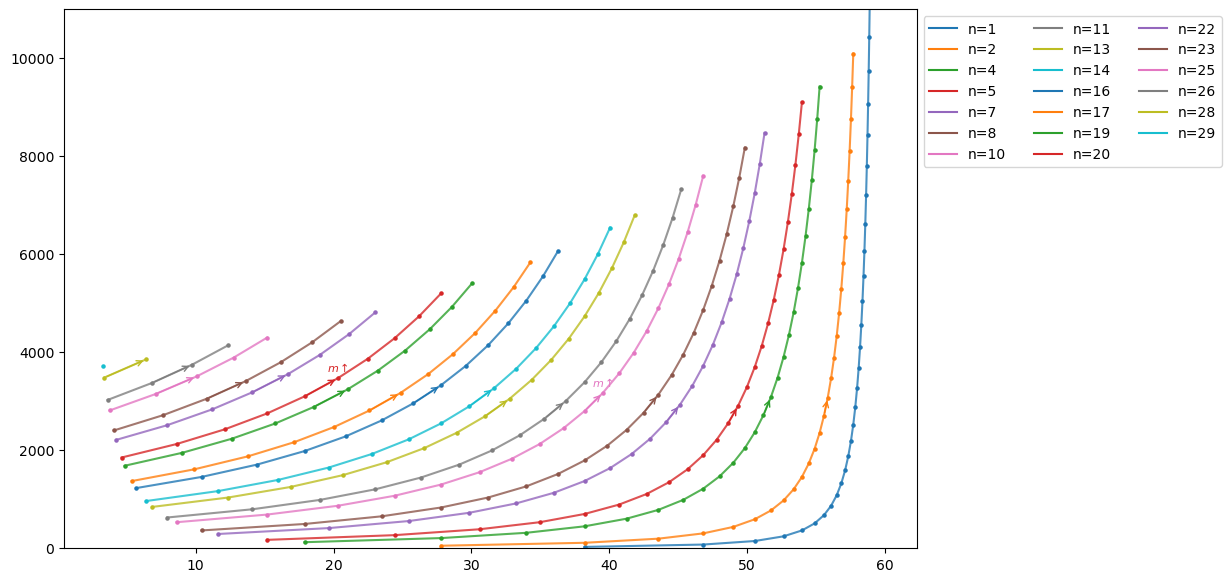

In [5]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import math
import numpy as np

fig, ax = plt.subplots(figsize=(11, 7))

# Store points for each unique n value
points_by_n = {}

for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)

            if abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    #ax.scatter(np.degrees(alpha), N, s=5, label=f'{m},{n}', color='orange', alpha=0.8)

                    if n not in points_by_n:
                        points_by_n[n] = {'alphas': [], 'N_values': []}

                    points_by_n[n]['alphas'].append(np.degrees(alpha))
                    points_by_n[n]['N_values'].append(N)

# Connect points for each unique n value
for n, data in points_by_n.items():
    ax.scatter(data['alphas'], data['N_values'], s=5, label=f'n={n}')
    line = ax.plot(data['alphas'], data['N_values'], label=f'n={n}', alpha=0.8)[0]

    # Add arrow indicating the direction of increasing 'm'
    arrow_index = len(data['alphas']) // 2  # Change this to adjust arrow position
    ax.annotate('', xy=(data['alphas'][arrow_index], data['N_values'][arrow_index]),
                xytext=(data['alphas'][arrow_index - 1], data['N_values'][arrow_index - 1]),
                arrowprops=dict(arrowstyle='->', color=line.get_color(), lw=1))

    # Add a text annotation
    if n % 10 == 0:  # Add 'm ↑' on top of one arrow
        ax.text(data['alphas'][arrow_index], data['N_values'][arrow_index] + 100, r'$m \uparrow$', 
                color=line.get_color(), ha='center', va='bottom', fontsize=8, weight='bold')

# Create custom legend handles for the lines
line_handles = [Line2D([0], [0], color=line.get_color(), label=line.get_label()) for line in ax.lines if int(line.get_label().split('=')[1]) <= 88]

ax.set_ylim(bottom=0, top=11000)  # Adjust the values according to your requirements

# Create the legend with custom handles
legend = ax.legend(handles=line_handles, loc='upper left', bbox_to_anchor=(1, 1), ncol=3)

plt.show()

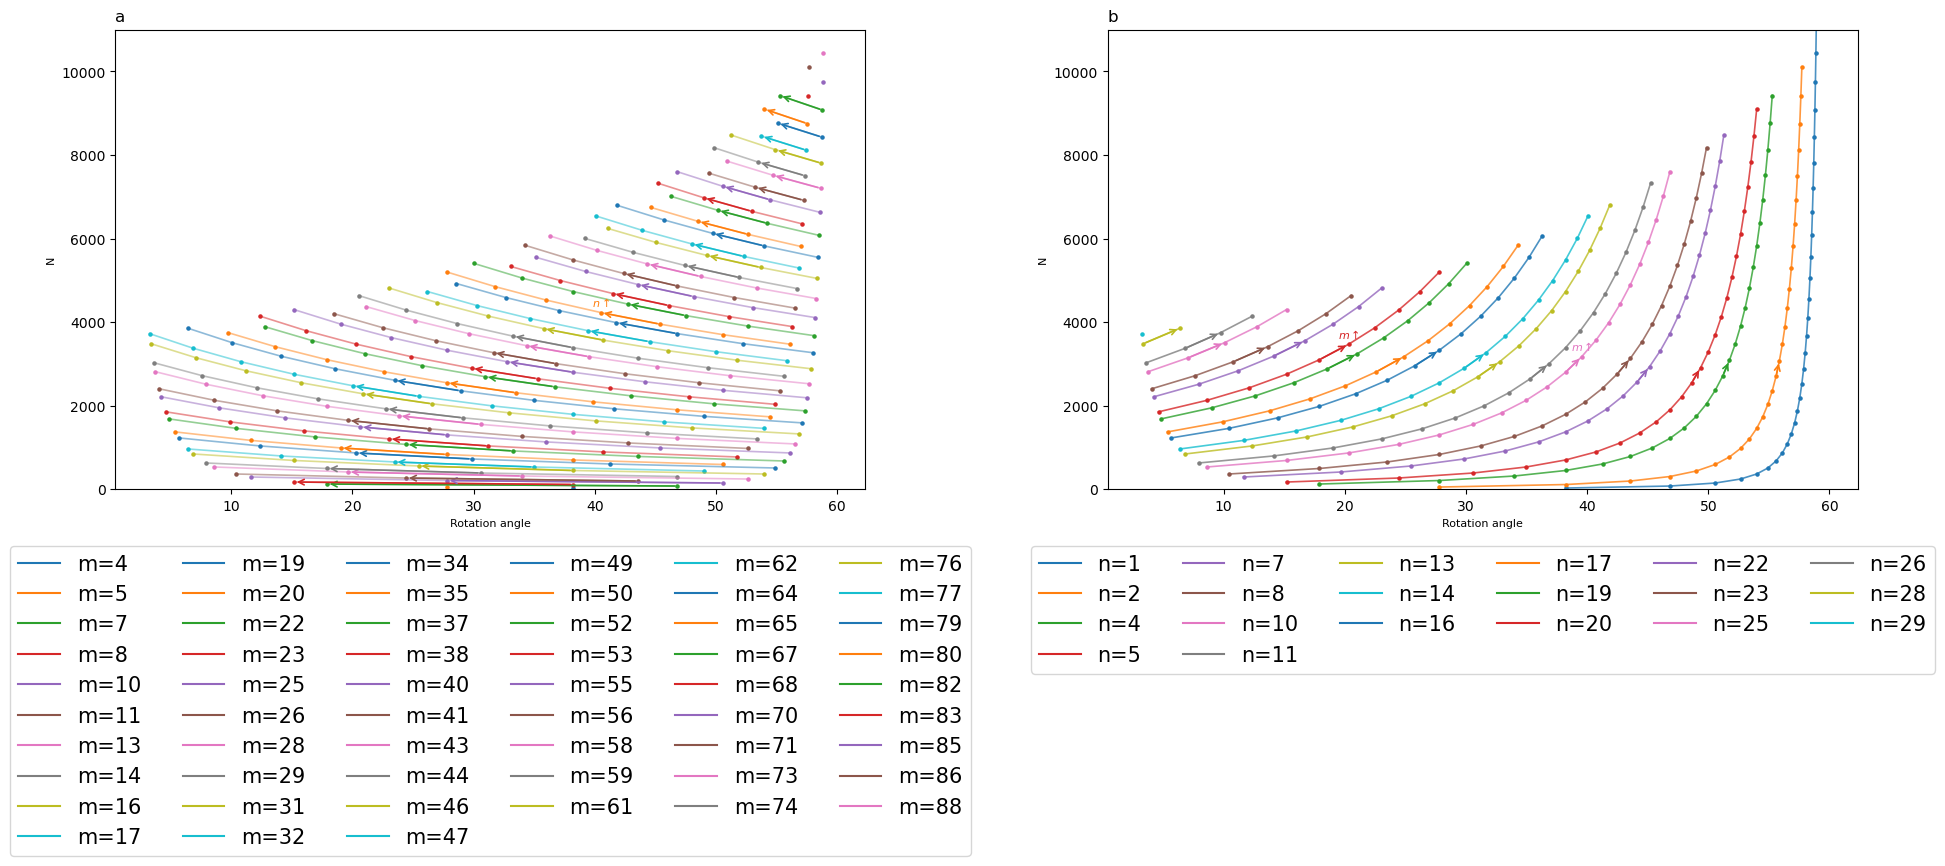

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.lines import Line2D

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 9))  # Two subplots stacked vertically

# Create dictionaries to store points for each m value
points_by_m = {}
points_by_n = {}
for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)

            if abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    #ax1.scatter(np.degrees(alpha), N, s=5, label=f'{m},{n}', color='orange', alpha=0.8)

                    if m not in points_by_m:
                        points_by_m[m] = {'alphas': [], 'N_values': []}

                    points_by_m[m]['alphas'].append(np.degrees(alpha))
                    points_by_m[m]['N_values'].append(N)

                    
# Connect points for each unique m value
for m, data in points_by_m.items():
    ax1.scatter(data['alphas'], data['N_values'], s=5, label=f'm={m}')
    line = ax1.plot(data['alphas'], data['N_values'], label=f'm={m}', alpha=0.5, lw = 1.2)[0]

    arrow_index = len(data['alphas']) // 2  # Change this to adjust arrow position
    ax1.annotate('', xy=(data['alphas'][arrow_index], data['N_values'][arrow_index]),
                xytext=(data['alphas'][arrow_index - 1], data['N_values'][arrow_index - 1]),
                arrowprops=dict(arrowstyle='->', color=line.get_color(), lw = 1.2))

    # Add a text annotation
    if  m == 50:  # Add 'm ↑' on top of one arrow
        ax1.text(data['alphas'][arrow_index], data['N_values'][arrow_index] + 100, r'$n \uparrow$', 
                color=line.get_color(), ha='center', va='bottom', fontsize=8, weight='bold')

    
# Customize plot if needed
ax1.set_xlabel('Rotation angle', fontsize=8)
ax1.set_ylabel('N', fontsize=8)
ax1.set_title('a', loc='left')
ax1.set_ylim(bottom=0, top=11000)  # Adjust the values according to your requirements

# Create custom legend handles for the lines
line_handles_m = [Line2D([0], [0], color=line.get_color(), label=line.get_label()) for line in ax1.lines if
                int(line.get_label().split('=')[1]) <= 88]

# Create the legend with custom handles
legend_m = ax1.legend(handles=line_handles_m, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6, fontsize = 15)

for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)

            if abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    #ax2.scatter(np.degrees(alpha), N, s=5, label=f'{m},{n}', color='orange', alpha=0.8)

                    if n not in points_by_n:
                        points_by_n[n] = {'alphas': [], 'N_values': []}

                    points_by_n[n]['alphas'].append(np.degrees(alpha))
                    points_by_n[n]['N_values'].append(N)

# Connect points for each unique n value
for n, data in points_by_n.items():
    ax2.scatter(data['alphas'], data['N_values'], s=5, label=f'n={n}')
    line = ax2.plot(data['alphas'], data['N_values'], label=f'n={n}', alpha=0.8, lw = 1.2)[0]

    # Add arrow indicating the direction of increasing 'm'
    arrow_index = len(data['alphas']) // 2  # Change this to adjust arrow position
    ax2.annotate('', xy=(data['alphas'][arrow_index], data['N_values'][arrow_index]),
                xytext=(data['alphas'][arrow_index - 1], data['N_values'][arrow_index - 1]),
                arrowprops=dict(arrowstyle='->', color=line.get_color(), lw = 1.2))

    # Add a text annotation
    if n % 10 == 0:  # Add 'm ↑' on top of one arrow
        ax2.text(data['alphas'][arrow_index], data['N_values'][arrow_index] + 100, r'$m \uparrow$', 
                color=line.get_color(), ha='center', va='bottom', fontsize=8, weight='bold')

# Customize plot if needed
ax2.set_xlabel('Rotation angle', fontsize=8)
ax2.set_ylabel('N', fontsize=8)
ax2.set_title('b', loc='left')

ax2.set_ylim(bottom=0, top=11000)  # Adjust the values according to your requirements

# Create custom legend handles for the lines
line_handles_n = [Line2D([0], [0], color=line.get_color(), label=line.get_label()) for line in ax2.lines if
                int(line.get_label().split('=')[1]) <= 30]

# Create the legend with custom handles
legend_n = ax2.legend(handles=line_handles_n, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6, fontsize = 15)

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.savefig('figure12.png', dpi=300, bbox_inches='tight')

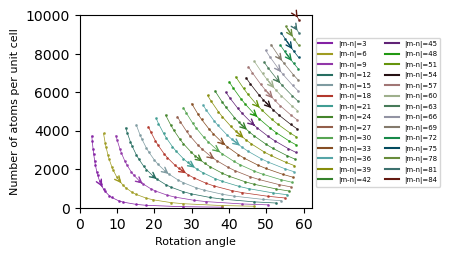

In [60]:
import matplotlib.pyplot as plt
import math
import numpy as np

fig, ax = plt.subplots(figsize=(3.0, 2.5))

# Dictionary to store colors for each abs_diff value
abs_diff_colors = {}

# Dictionary to store points for each abs_diff value
abs_diff_points = {}
handles = []
for m in range(0, 201):
    for n in range(1, 201):
        if m > n :
            abs_diff = abs(m - n)

            # Check if a color is assigned for this abs_diff value
            if abs_diff not in abs_diff_colors:
                # Assign a new darkened color if not already assigned
                base_color = np.random.rand(3)
                darkened_color = tuple(c * 0.7 for c in base_color)
                abs_diff_colors[abs_diff] = darkened_color

                # Initialize the list of points for this abs_diff value
                abs_diff_points[abs_diff] = []

            color = abs_diff_colors[abs_diff]

            # Check if a color is assigned for this abs_diff value
            if abs_diff not in abs_diff_colors:
                # Assign a new darkened color if not already assigned
                base_color = np.random.rand(3)
                darkened_color = tuple(c * 0.7 for c in base_color)
                abs_diff_colors[abs_diff] = darkened_color

                # Initialize the list of points for this abs_diff value
                abs_diff_points[abs_diff] = []

            color = abs_diff_colors[abs_diff]

            if abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    scatter = ax.scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color=color, alpha=0.8)
                    abs_diff_points[abs_diff].append((np.degrees(alpha), N))

# Plot curves connecting points with the same abs_diff value
for abs_diff, points_list in abs_diff_points.items():
    if len(points_list) > 1 and abs_diff <= 87:
        points_list = sorted(points_list, key=lambda x: x[0])
        x_values, y_values = zip(*points_list)
        color = abs_diff_colors[abs_diff]  # Use the correct color variable
        ax.plot(x_values, y_values, color=color, linestyle='-', linewidth=0.5, label=f'|m-n|={abs_diff}')
        handles.append(plt.Line2D([0], [0], color=color, label=f'|m-n|={abs_diff}'))
        # Add arrow indicating the direction of increasing 'm' and 'n' for a specific abs_diff value
        arrow_index = len(points_list) // 2  # Change this to adjust arrow position
        ax.annotate('', xy=(x_values[arrow_index], y_values[arrow_index]),
                    xytext=(x_values[arrow_index - 1], y_values[arrow_index - 1]),
                    arrowprops=dict(arrowstyle='->', color=color, lw=1))

        if abs_diff == 1:
            ax.annotate(r'$\downarrow$m,$\downarrow$n', xy=(x_values[arrow_index], y_values[arrow_index]),
                        xytext=(x_values[arrow_index]-2.5 , y_values[arrow_index] - 100),
                        ha='center', va='center', color=color, fontsize=5)


# Manually create a custom horizontal legend with two colors next to each other
legend = ax.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 0.9), ncol=2, fontsize=5)

ax.set_xticks([0, 10, 20, 30, 40, 50, 60])    
ax.set_xlabel('Rotation angle', fontsize=8)
ax.set_ylabel('Number of atoms per unit cell', fontsize=8)

ax.set_ylim(bottom=0, top=10000)

#plt.show()
plt.savefig('Report- figure16.png', dpi=300, bbox_inches='tight')

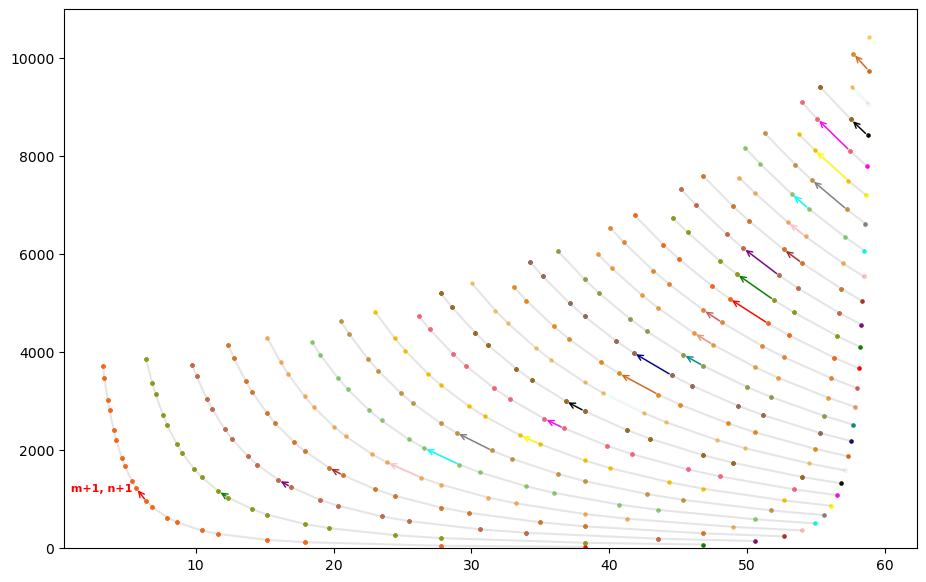

In [54]:
import matplotlib.pyplot as plt
import math
import numpy as np
from itertools import cycle, islice


fig, ax = plt.subplots(figsize=(11, 7))

for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if abs_diff % 3 != 0:
                if n < 31 and m < 31:
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2)
                #    ax.scatter(np.degrees(alpha), N, s=5, label=f'{m},{n}', color='blue')
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    ax.scatter(np.degrees(alpha), N, s=5, label=f'{m},{n}', color='orange', alpha=0.5)
                    orange_points.add((np.degrees(alpha), N))
                    
                    nm_list = [(s + 4, 1) for s in range(0, 82, 3)] 
                    
                    colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))
                    for i in range(len(nm_list)):
                        if m == nm_list[i][0] and n == nm_list[i][1]:
                            m2 = m
                            n2 = n
                            color = colors[i]
                            x_values = []
                            y_values = []
                            for m1 in range(0, 91):
                                for n1 in range(0, 91):
                                    if m1 == m2 and n1 == n2:
                                        cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                        alpha2 = math.acos(cosalpha2)
                                        N2 = 4 * (n2**2 + m2*n2 + m2**2) / 3
                                        point_to_plot = (np.degrees(alpha2), N2)
                                        if point_to_plot in orange_points:
                                            ax.scatter(point_to_plot[0], point_to_plot[1], s=5, label=f'{m},{n}', color=color)
                                            x_values.append(point_to_plot[0])
                                            y_values.append(point_to_plot[1])
                                            
                                        m2 = m2 + 1
                                        n2 = n2 + 1
                            ax.plot(x_values, y_values, label=f'{m},{n}', color='grey',alpha= 0.2)

                            
                            arrow_index = len(x_values) // 2  # Change this to adjust arrow position
                            ax.annotate('', xy=(x_values[arrow_index], y_values[arrow_index]),
                                        xytext=(x_values[arrow_index - 1], y_values[arrow_index - 1]),
                                        arrowprops=dict(arrowstyle='->', color=color, lw=1))

                            if n == 1:
                                if m == 4:
                                    ax.annotate(r' m+1, n+1', xy=(x_values[arrow_index], y_values[arrow_index]),
                                                xytext=(x_values[arrow_index] - 5, y_values[arrow_index] - 100),
                                                ha='left', va='bottom', color=color, fontsize=8, weight='bold')

ax.set_ylim(bottom=0, top=11000)  # Adjust the values according to your requirements

plt.show()

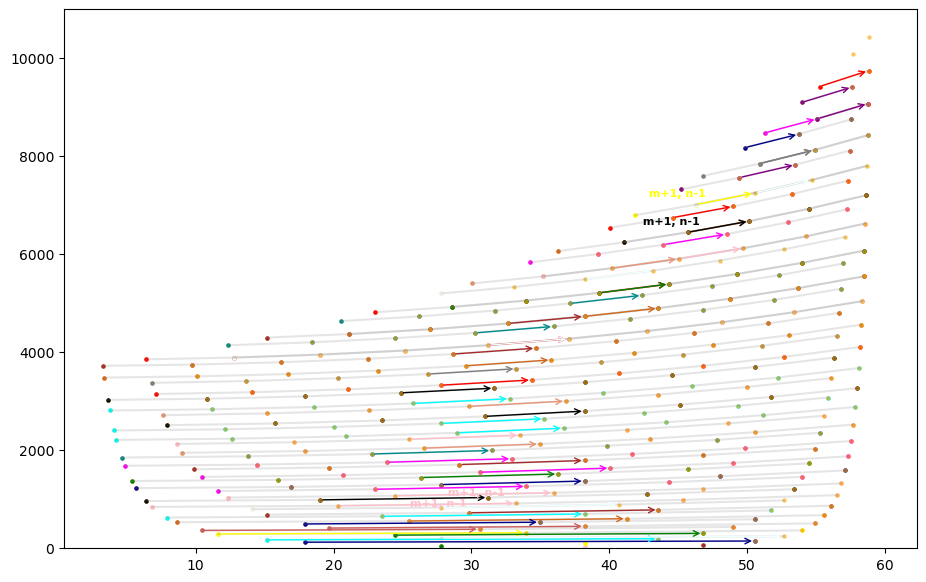

In [53]:
import matplotlib.pyplot as plt
import math
import numpy as np
from itertools import cycle, islice


fig, ax = plt.subplots(figsize=(11, 7))

for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if abs_diff % 3 != 0:
                if n < 31 and m < 31:
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2)
                #    ax.scatter(np.degrees(alpha), N, s=5, label=f'{m},{n}', color='blue')
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    ax.scatter(np.degrees(alpha), N, s=5, label=f'{m},{n}', color='orange', alpha=0.5)
                    orange_points.add((np.degrees(alpha), N))
                    
                    nm_list0 = list(set([(s + 3, s - 3) for s in range(5, 32, 3)] +
                                       [(s + 1, s - 2) for s in range(3, 32, 1)] +
                                       [(34 + 2*i, 28 - i) for i in range(0, 25, 1)] +
                                       [(s + 3, s - 3) for s in range(4, 32, 3)] +
                                       [(37 + 6*i, 25 - 3*i) for i in range(0, 8)]))                    
                    nm_list = list(set(nm_list0))

                    colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))
                    for i in range(len(nm_list)):
                        if m == nm_list[i][0] and n == nm_list[i][1]:
                            m2 = m
                            n2 = n
                            color = colors[i]
                            x_values = []
                            y_values = []
                            for m1 in range(0, 91):
                                for n1 in range(0, 91):
                                    if m1 == m2 and n1 == n2:
                                        cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                        alpha2 = math.acos(cosalpha2)
                                        N2 = 4 * (n2**2 + m2*n2 + m2**2) / 3
                                        point_to_plot = (np.degrees(alpha2), N2)
                                        if point_to_plot in orange_points:
                                            ax.scatter(point_to_plot[0], point_to_plot[1], s=5, label=f'{m},{n}', color=color)
                                            x_values.append(point_to_plot[0])
                                            y_values.append(point_to_plot[1])
                                            
                                        m2 = m2 + 1
                                        n2 = n2 - 1
                            ax.plot(x_values, y_values, label=f'{m},{n}', color='grey',alpha= 0.2)

                            
                            arrow_index = len(x_values) // 2  # Change this to adjust arrow position
                            ax.annotate('', xy=(x_values[arrow_index], y_values[arrow_index]),
                                        xytext=(x_values[arrow_index - 1], y_values[arrow_index - 1]),
                                        arrowprops=dict(arrowstyle='->', color=color, lw=1))

                            if n == 13:
                                
                                ax.annotate(r' m+1, n-1', xy=(x_values[arrow_index], y_values[arrow_index]),
                                            xytext=(x_values[arrow_index] - 8, y_values[arrow_index] - 100),
                                            ha='left', va='bottom', color=color, fontsize=8, weight='bold')

ax.set_ylim(bottom=0, top=11000)  # Adjust the values according to your requirements

plt.show()

In [31]:
nm_list = list(set(
    [(s + 3, s - 3) for s in range(5, 32, 3)] +
    [(s + 1, s - 2) for s in range(3, 32, 1)] +
    [(34 + 2*i, 28 - i) for i in range(0, 25, 1)] +
    [(s + 3, s - 3) for s in range(4, 32, 3)] +
    [(37 + 6*i, 25 - 3*i) for i in range(0, 8)]
))


# Eliminate repetitions
nm_list_no_repetitions = list(set(nm_list))

# Print the list without repetitions
print("List without repetitions:", nm_list_no_repetitions)


Original list: [(34, 28), (11, 5), (68, 11), (7, 1), (16, 13), (26, 23), (78, 6), (8, 2), (22, 19), (17, 14), (50, 20), (13, 10), (14, 8), (23, 20), (52, 19), (24, 21), (62, 14), (20, 17), (30, 27), (16, 10), (26, 20), (25, 22), (73, 7), (64, 13), (22, 16), (21, 18), (17, 11), (31, 28), (74, 8), (36, 27), (27, 24), (13, 7), (46, 22), (5, 2), (80, 5), (23, 17), (19, 13), (28, 25), (42, 24), (48, 21), (20, 14), (29, 26), (67, 10), (58, 16), (7, 4), (44, 23), (25, 19), (54, 18), (31, 25), (60, 15), (79, 4), (32, 29), (4, 1), (14, 11), (70, 10), (10, 7), (76, 7), (28, 22), (37, 25), (43, 22), (6, 3), (38, 26), (29, 23), (11, 8), (82, 4), (49, 19), (12, 9), (40, 25), (55, 16), (8, 5), (32, 26), (18, 15), (56, 17), (61, 13), (10, 4), (9, 6), (19, 16), (66, 12), (15, 12), (72, 9)]
List without repetitions: [(34, 28), (11, 5), (68, 11), (7, 1), (16, 13), (26, 23), (78, 6), (8, 2), (22, 19), (17, 14), (50, 20), (13, 10), (14, 8), (23, 20), (52, 19), (24, 21), (62, 14), (20, 17), (30, 27), (16, 

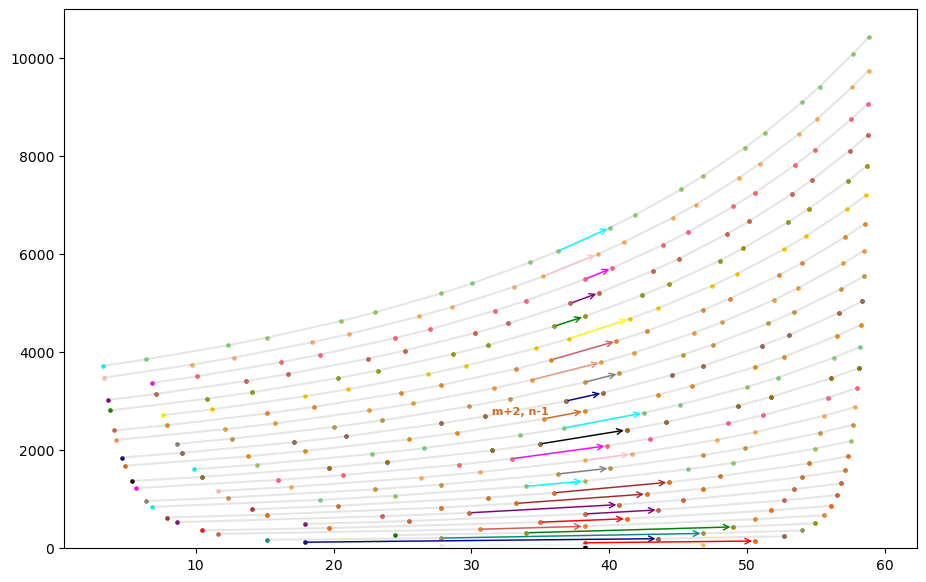

In [52]:
import matplotlib.pyplot as plt
import math
import numpy as np
from itertools import cycle, islice


fig, ax = plt.subplots(figsize=(11, 7))

for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if abs_diff % 3 != 0:
                if n < 31 and m < 31:
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2)
                #    ax.scatter(np.degrees(alpha), N, s=5, label=f'{m},{n}', color='blue')
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    ax.scatter(np.degrees(alpha), N, s=5, label=f'{m},{n}', color='orange', alpha=0.5)
                    orange_points.add((np.degrees(alpha), N))
                    
                    nm_list = [(s + 3, s - 3) for s in range(5, 32, 3)] + [(s + 1, s - 2) for s in range(3, 32, 1)]
                    
                    colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))
                    for i in range(len(nm_list)):
                        if m == nm_list[i][0] and n == nm_list[i][1]:
                            m2 = m
                            n2 = n
                            color = colors[i]
                            x_values = []
                            y_values = []
                            for m1 in range(0, 91):
                                for n1 in range(0, 91):
                                    if m1 == m2 and n1 == n2:
                                        cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                        alpha2 = math.acos(cosalpha2)
                                        N2 = 4 * (n2**2 + m2*n2 + m2**2) / 3
                                        point_to_plot = (np.degrees(alpha2), N2)
                                        if point_to_plot in orange_points:
                                            ax.scatter(point_to_plot[0], point_to_plot[1], s=5, label=f'{m},{n}', color=color)
                                            x_values.append(point_to_plot[0])
                                            y_values.append(point_to_plot[1])
                                            
                                        m2 = m2 + 2
                                        n2 = n2 - 1
                            ax.plot(x_values, y_values, label=f'{m},{n}', color='grey',alpha= 0.2)

                            arrow_index = len(x_values) // 2  # Change this to adjust arrow position
                            ax.annotate('', xy=(x_values[arrow_index], y_values[arrow_index]),
                                        xytext=(x_values[arrow_index - 1], y_values[arrow_index - 1]),
                                        arrowprops=dict(arrowstyle='->', color=color, lw=1))

                            if n == 19:
                                
                                ax.annotate(r' m+2, n-1', xy=(x_values[arrow_index], y_values[arrow_index]),
                                            xytext=(x_values[arrow_index] - 7, y_values[arrow_index] - 100),
                                            ha='left', va='bottom', color=color, fontsize=8, weight='bold')

ax.set_ylim(bottom=0, top=11000)  # Adjust the values according to your requirements

plt.show()

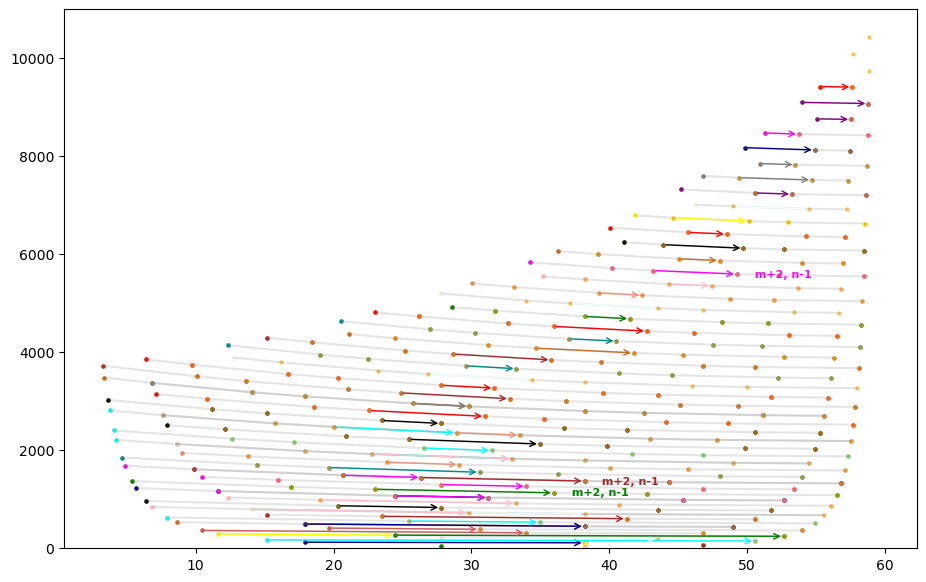

In [76]:
import matplotlib.pyplot as plt
import math
import numpy as np
from itertools import cycle, islice


fig, ax = plt.subplots(figsize=(11, 7))

for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if abs_diff % 3 != 0:
                if n < 31 and m < 31:
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2)
                #    ax.scatter(np.degrees(alpha), N, s=5, label=f'{m},{n}', color='blue')
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    ax.scatter(np.degrees(alpha), N, s=5, label=f'{m},{n}', color='orange', alpha=0.5)
                    orange_points.add((np.degrees(alpha), N))
                    
                    nm_list0 = [(s + 3, s - 3) for s in range(5, 32, 3)] + [(s + 1, s - 2) for s in range(3, 32, 1)] + [(34 + 2*i, 28 - i) for i in range(0, 25, 1)] + [(s + 3, s - 3) for s in range(4, 32, 3)] + [(37 + 6*i, 25 - 3*i) for i in range(0, 8)]
                    nm_list = list(set(nm_list0))
                    colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))
                    for i in range(len(nm_list)):
                        if m == nm_list[i][0] and n == nm_list[i][1]:
                            m2 = m
                            n2 = n
                            color = colors[i]
                            x_values = []
                            y_values = []
                            for m1 in range(0, 91):
                                for n1 in range(0, 91):
                                    if m1 == m2 and n1 == n2:
                                        cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                        alpha2 = math.acos(cosalpha2)
                                        N2 = 4 * (n2**2 + m2*n2 + m2**2) / 3
                                        point_to_plot = (np.degrees(alpha2), N2)
                                        if point_to_plot in orange_points:
                                            ax.scatter(point_to_plot[0], point_to_plot[1], s=5, label=f'{m},{n}', color=color)
                                            x_values.append(point_to_plot[0])
                                            y_values.append(point_to_plot[1])
                                            
                                        m2 = m2 + 1
                                        n2 = n2 - 2
                            ax.plot(x_values, y_values, label=f'{m},{n}', color='grey',alpha= 0.2)

                            arrow_index = len(x_values) // 2  # Change this to adjust arrow position
                            ax.annotate('', xy=(x_values[arrow_index], y_values[arrow_index]),
                                        xytext=(x_values[arrow_index - 1], y_values[arrow_index - 1]),
                                        arrowprops=dict(arrowstyle='->', color=color, lw=1))

                            if n == 17:
                                
                                ax.annotate(r' m+2, n-1', xy=(x_values[arrow_index], y_values[arrow_index]),
                                            xytext=(x_values[arrow_index] +1, y_values[arrow_index] - 100),
                                            ha='left', va='bottom', color=color, fontsize=8, weight='bold')

                            
ax.set_ylim(bottom=0, top=11000)  # Adjust the values according to your requirements
#ax.set_title("this graph connect the points that follow the rule: when m is increasing by 1, n is decreasing by 2")

plt.show()

In [26]:
orange_points = set()

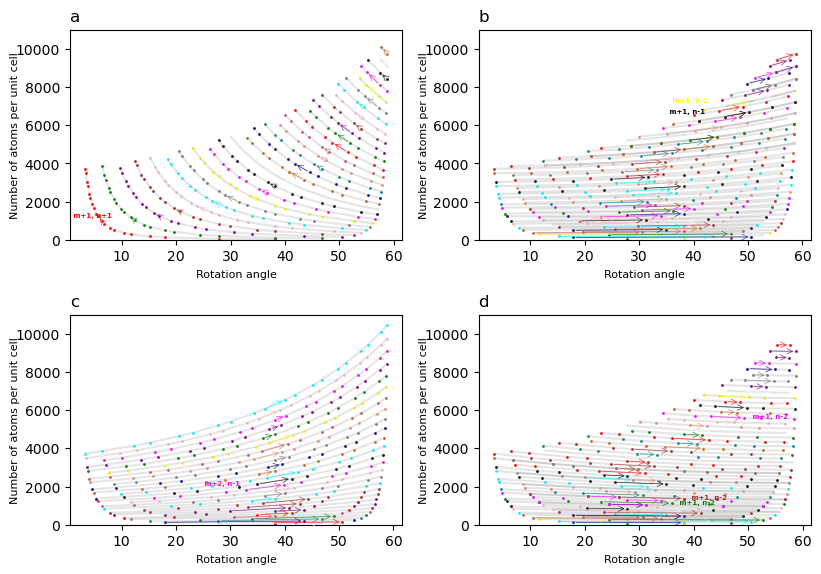

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import math
from itertools import cycle, islice

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(210 / 25.4, 148.5 / 25.4))

# Flatten the axs array for easy indexing
axs = axs.flatten()

for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if abs_diff % 3 != 0:
                if n < 31 and m < 31:
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2)
                #    axs[0].scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='blue')
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    #axs[0].scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='orange', alpha=0.5)
                    orange_points.add((np.degrees(alpha), N))
                    
                    nm_list = [(s + 4, 1) for s in range(0, 82, 3)] 
                    
                    colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))
                    for i in range(len(nm_list)):
                        if m == nm_list[i][0] and n == nm_list[i][1]:
                            m2 = m
                            n2 = n
                            color = colors[i]
                            x_values = []
                            y_values = []
                            for m1 in range(0, 91):
                                for n1 in range(0, 91):
                                    if m1 == m2 and n1 == n2:
                                        cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                        alpha2 = math.acos(cosalpha2)
                                        N2 = 4 * (n2**2 + m2*n2 + m2**2) / 3
                                        point_to_plot = (np.degrees(alpha2), N2)
                                        if point_to_plot in orange_points:
                                            axs[0].scatter(point_to_plot[0], point_to_plot[1], s=1, label=f'{m},{n}', color=color)
                                            x_values.append(point_to_plot[0])
                                            y_values.append(point_to_plot[1])
                                            
                                        m2 = m2 + 1
                                        n2 = n2 + 1
                            axs[0].plot(x_values, y_values, label=f'{m},{n}', color='grey',alpha= 0.2)

                            
                            arrow_index = len(x_values) // 2  # Change this to adjust arrow position
                            axs[0].annotate('', xy=(x_values[arrow_index], y_values[arrow_index]),
                                        xytext=(x_values[arrow_index - 1], y_values[arrow_index - 1]),
                                        arrowprops=dict(arrowstyle='->', color=color, lw=0.5, alpha = 0.8))

                            if n == 1:
                                if m == 4:
                                    axs[0].annotate(r' m+1, n+1', xy=(x_values[arrow_index], y_values[arrow_index]),
                                                xytext=(x_values[arrow_index] - 5, y_values[arrow_index] - 100),
                                                ha='left', va='bottom', color=color, fontsize=5, weight='bold')


for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if abs_diff % 3 != 0:
                if n < 31 and m < 31:
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2)
                #    axs[1].scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='blue')
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    #axs[1].scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='orange', alpha=0.5)
                    orange_points.add((np.degrees(alpha), N))
                    
                    nm_list0 = list(set([(s + 3, s - 3) for s in range(5, 32, 3)] +
                                       [(s + 1, s - 2) for s in range(3, 32, 1)] +
                                       [(34 + 2*i, 28 - i) for i in range(0, 25, 1)] +
                                       [(s + 3, s - 3) for s in range(4, 32, 3)] +
                                       [(37 + 6*i, 25 - 3*i) for i in range(0, 8)]))                    
                    nm_list = list(set(nm_list0))

                    colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))
                    for i in range(len(nm_list)):
                        if m == nm_list[i][0] and n == nm_list[i][1]:
                            m2 = m
                            n2 = n
                            color = colors[i]
                            x_values = []
                            y_values = []
                            for m1 in range(0, 91):
                                for n1 in range(0, 91):
                                    if m1 == m2 and n1 == n2:
                                        cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                        alpha2 = math.acos(cosalpha2)
                                        N2 = 4 * (n2**2 + m2*n2 + m2**2) / 3
                                        point_to_plot = (np.degrees(alpha2), N2)
                                        if point_to_plot in orange_points:
                                            axs[1].scatter(point_to_plot[0], point_to_plot[1], s=1, label=f'{m},{n}', color=color)
                                            x_values.append(point_to_plot[0])
                                            y_values.append(point_to_plot[1])
                                            
                                        m2 = m2 + 1
                                        n2 = n2 - 1
                            axs[1].plot(x_values, y_values, label=f'{m},{n}', color='grey',alpha= 0.2)

                            
                            arrow_index = len(x_values) // 2  # Change this to adjust arrow position
                            axs[1].annotate('', xy=(x_values[arrow_index], y_values[arrow_index]),
                                        xytext=(x_values[arrow_index - 1], y_values[arrow_index - 1]),
                                        arrowprops=dict(arrowstyle='->', color=color, lw=0.5, alpha = 0.8))

                            if n == 13:
                                
                                axs[1].annotate(r' m+1, n-1', xy=(x_values[arrow_index], y_values[arrow_index]),
                                            xytext=(x_values[arrow_index] - 15, y_values[arrow_index] - 100),
                                            ha='left', va='bottom', color=color, fontsize=5, weight='bold')

for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if abs_diff % 3 != 0:
                if n < 31 and m < 31:
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2)
                #    axs[2].scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='blue')
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    #axs[2].scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='orange', alpha=0.5)
                    orange_points.add((np.degrees(alpha), N))
                    
                    nm_list = [(s + 3, s - 3) for s in range(5, 32, 3)] + [(s + 1, s - 2) for s in range(3, 32, 1)]
                    
                    colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))
                    for i in range(len(nm_list)):
                        if m == nm_list[i][0] and n == nm_list[i][1]:
                            m2 = m
                            n2 = n
                            color = colors[i]
                            x_values = []
                            y_values = []
                            for m1 in range(0, 91):
                                for n1 in range(0, 91):
                                    if m1 == m2 and n1 == n2:
                                        cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                        alpha2 = math.acos(cosalpha2)
                                        N2 = 4 * (n2**2 + m2*n2 + m2**2) / 3
                                        point_to_plot = (np.degrees(alpha2), N2)
                                        if point_to_plot in orange_points:
                                            axs[2].scatter(point_to_plot[0], point_to_plot[1], s=1, label=f'{m},{n}', color=color)
                                            x_values.append(point_to_plot[0])
                                            y_values.append(point_to_plot[1])
                                            
                                        m2 = m2 + 2
                                        n2 = n2 - 1
                            axs[2].plot(x_values, y_values, label=f'{m},{n}', color='grey',alpha= 0.2)

                            arrow_index = len(x_values) // 2  # Change this to adjust arrow position
                            axs[2].annotate('', xy=(x_values[arrow_index], y_values[arrow_index]),
                                        xytext=(x_values[arrow_index - 1], y_values[arrow_index - 1]),
                                        arrowprops=dict(arrowstyle='->', color=color, lw=0.5,alpha = 0.8))

                            if n == 16:
                                
                                axs[2].annotate(r' m+2, n-1', xy=(x_values[arrow_index], y_values[arrow_index]),
                                            xytext=(x_values[arrow_index] - 15, y_values[arrow_index] - 100),
                                            ha='left', va='bottom', color=color, fontsize=5, weight='bold')


                                
for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if abs_diff % 3 != 0:
                if n < 31 and m < 31:
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2)
                #    axs[3].scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='blue')
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    #axs[3].scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='orange', alpha=0.5)
                    orange_points.add((np.degrees(alpha), N))
                    
                    nm_list0 = [(s + 3, s - 3) for s in range(5, 32, 3)] + [(s + 1, s - 2) for s in range(3, 32, 1)] + [(34 + 2*i, 28 - i) for i in range(0, 25, 1)] + [(s + 3, s - 3) for s in range(4, 32, 3)] + [(37 + 6*i, 25 - 3*i) for i in range(0, 8)]
                    nm_list = list(set(nm_list0))
                    colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))
                    for i in range(len(nm_list)):
                        if m == nm_list[i][0] and n == nm_list[i][1]:
                            m2 = m
                            n2 = n
                            color = colors[i]
                            x_values = []
                            y_values = []
                            for m1 in range(0, 91):
                                for n1 in range(0, 91):
                                    if m1 == m2 and n1 == n2:
                                        cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                        alpha2 = math.acos(cosalpha2)
                                        N2 = 4 * (n2**2 + m2*n2 + m2**2) / 3
                                        point_to_plot = (np.degrees(alpha2), N2)
                                        if point_to_plot in orange_points:
                                            axs[3].scatter(point_to_plot[0], point_to_plot[1], s=1, label=f'{m},{n}', color=color)
                                            x_values.append(point_to_plot[0])
                                            y_values.append(point_to_plot[1])
                                            
                                        m2 = m2 + 1
                                        n2 = n2 - 2
                            axs[3].plot(x_values, y_values, label=f'{m},{n}', color='grey',alpha= 0.2)

                            arrow_index = len(x_values) // 2  # Change this to adjust arrow position
                            axs[3].annotate('', xy=(x_values[arrow_index], y_values[arrow_index]),
                                        xytext=(x_values[arrow_index - 1], y_values[arrow_index - 1]),
                                        arrowprops=dict(arrowstyle='->', color=color, lw=0.5,alpha = 0.8))

                            if n == 17:
                                
                                axs[3].annotate(r' m+1, n-2', xy=(x_values[arrow_index], y_values[arrow_index]),
                                            xytext=(x_values[arrow_index] +1, y_values[arrow_index] - 100),
                                            ha='left', va='bottom', color=color, fontsize=5, weight='bold')


                                
axs[0].set_xlabel('Rotation angle', fontsize=8)
axs[0].set_ylabel('Number of atoms per unit cell', fontsize=8)
axs[0].yaxis.set_label_coords(-0.15, 0.5)
axs[0].set_title('a', loc='left')                           
axs[1].set_xlabel('Rotation angle', fontsize=8)
axs[1].set_ylabel('Number of atoms per unit cell', fontsize=8)
axs[1].yaxis.set_label_coords(-0.15, 0.5)
axs[1].set_title('b', loc='left')                           
axs[2].set_xlabel('Rotation angle', fontsize=8)
axs[2].set_ylabel('Number of atoms per unit cell', fontsize=8)
axs[2].yaxis.set_label_coords(-0.15, 0.5)
axs[2].set_title('c', loc='left')
axs[3].set_xlabel('Rotation angle', fontsize=8)
axs[3].set_ylabel('Number of atoms per unit cell', fontsize=8)
axs[3].set_title('d', loc='left')
axs[3].yaxis.set_label_coords(-0.15, 0.5)
# Adjust layout
axs[0].set_ylim(bottom=0, top=11000) 
axs[1].set_ylim(bottom=0, top=11000) 
axs[2].set_ylim(bottom=0, top=11000) 
axs[3].set_ylim(bottom=0, top=11000) 
plt.tight_layout(h_pad=1.1, w_pad=1.5)
plt.savefig('figure14.png', dpi=300, bbox_inches='tight')

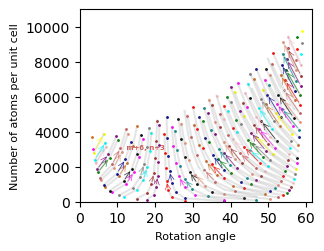

In [11]:
import matplotlib.pyplot as plt
import math
import numpy as np
from itertools import cycle, islice


fig, ax = plt.subplots(figsize=(3.0, 2.5))

for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if abs_diff % 3 != 0:
                if n < 31 and m < 31:
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2)
                #    ax.scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='blue')
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    #ax.scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='orange', alpha=0.5)
                    orange_points.add((np.degrees(alpha), N))
                    nm_list = [(s + 5, s + 2) for s in range(0, 28)] + [(s + 4, 1) for s in range(0, 82, 3)] + [(s + 4, 2) for s in range(4, 82, 3)]
                    colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))
                    for i in range(len(nm_list)):
                        if m == nm_list[i][0] and n == nm_list[i][1]:
                            m2 = m
                            n2 = n
                            color = colors[i]
                            x_values = []
                            y_values = []
                            for m1 in range(0, 91):
                                for n1 in range(0, 91):
                                    if m1 == m2 and n1 == n2:
                                        cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                        alpha2 = math.acos(cosalpha2)
                                        N2 = 4 * (n2**2 + m2*n2 + m2**2) / 3
                                        point_to_plot = (np.degrees(alpha2), N2)
                                        if point_to_plot in orange_points:
                                            ax.scatter(point_to_plot[0], point_to_plot[1], s=1, label=f'{m},{n}', color=color)
                                            x_values.append(point_to_plot[0])
                                            y_values.append(point_to_plot[1])
                                            
                                        m2 = m2 + 6
                                        n2 = n2 + 3
                            ax.plot(x_values, y_values, label=f'{m},{n}', color='grey',alpha= 0.2)

                            arrow_index = len(x_values) // 2  # Change this to adjust arrow position
                            ax.annotate('', xy=(x_values[arrow_index], y_values[arrow_index]),
                                        xytext=(x_values[arrow_index - 1], y_values[arrow_index - 1]),
                                        arrowprops=dict(arrowstyle='->', color=color, lw=0.5, alpha = 0.8))

                            if n == 17:
                                
                                ax.annotate(r' m+6, n+3', xy=(x_values[arrow_index], y_values[arrow_index]),
                                            xytext=(x_values[arrow_index] +1, y_values[arrow_index] - 100),
                                            ha='left', va='bottom', color=color, fontsize=5, weight='bold')

ax.set_xticks([0, 10, 20, 30, 40, 50, 60])                     
ax.set_xlabel('Rotation angle', fontsize=8)
ax.set_ylabel('Number of atoms per unit cell', fontsize=8)
                                                   
ax.set_ylim(bottom=0, top=11000)  # Adjust the values according to your requirements

#plt.show()
plt.savefig('figure15.png', dpi=300, bbox_inches='tight')

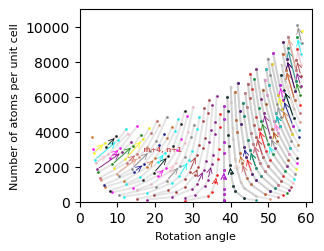

In [12]:
import matplotlib.pyplot as plt
import math
import numpy as np
from itertools import cycle, islice


fig, ax = plt.subplots(figsize=(3.0, 2.5))

for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if abs_diff % 3 != 0:
                if n < 31 and m < 31:
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2)
                #    ax.scatter(np.degrees(alpha), N, s=5, label=f'{m},{n}', color='blue')
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    #ax.scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='orange', alpha=0.5)
                    orange_points.add((np.degrees(alpha), N))
                    
                    nm_list = [(s + 5, s + 2) for s in range(0, 28)] + [(s + 4, 1) for s in range(0, 82, 3)] + [(s + 4, 2) for s in range(4, 82, 3)]+ [(s + 3, s - 3) for s in range(7, 31, 3)] 
                    
                    colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))
                    for i in range(len(nm_list)):
                        if m == nm_list[i][0] and n == nm_list[i][1]:
                            m2 = m
                            n2 = n
                            color = colors[i]
                            x_values = []
                            y_values = []
                            for m1 in range(0, 91):
                                for n1 in range(0, 91):
                                    if m1 == m2 and n1 == n2:
                                        cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                        alpha2 = math.acos(cosalpha2)
                                        N2 = 4 * (n2**2 + m2*n2 + m2**2) / 3
                                        point_to_plot = (np.degrees(alpha2), N2)
                                        if point_to_plot in orange_points:
                                            ax.scatter(point_to_plot[0], point_to_plot[1], s=1, label=f'{m},{n}', color=color, alpha = 0.8)
                                            x_values.append(point_to_plot[0])
                                            y_values.append(point_to_plot[1])
                                            
                                        m2 = m2 + 4
                                        n2 = n2 + 1
                            ax.plot(x_values, y_values, label=f'{m},{n}', color='grey',alpha= 0.2)
                            arrow_index = len(x_values) // 2  # Change this to adjust arrow position
                            ax.annotate('', xy=(x_values[arrow_index], y_values[arrow_index]),
                                        xytext=(x_values[arrow_index - 1], y_values[arrow_index - 1]),
                                        arrowprops=dict(arrowstyle='->', color=color, lw=0.5))

                            if n == 17:
                                
                                ax.annotate(r' m+4, n+1', xy=(x_values[arrow_index], y_values[arrow_index]),
                                            xytext=(x_values[arrow_index] +1, y_values[arrow_index]+100 ),
                                            ha='left', va='bottom', color=color, fontsize=5, weight='bold')



ax.set_xticks([0, 10, 20, 30, 40, 50, 60])                           
ax.set_xlabel('Rotation angle', fontsize=8)
ax.set_ylabel('Number of atoms per unit cell', fontsize=8)

                              
ax.set_ylim(bottom=0, top=11000)  # Adjust the values according to your requirements

plt.savefig('figure16.png', dpi=300, bbox_inches='tight')

In [9]:
m = 4
n = 1
cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
alpha = math.acos(cosalpha)
np.degrees(alpha)

38.21321070173819

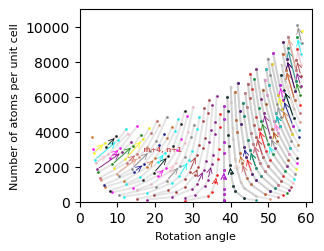

In [5]:
import matplotlib.pyplot as plt
import math
import numpy as np
from itertools import cycle, islice


fig, ax = plt.subplots(figsize=(3.0, 2.5))

for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if abs_diff % 3 != 0:
                if n < 31 and m < 31:
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2)
                #    ax.scatter(np.degrees(alpha), N, s=5, label=f'{m},{n}', color='blue')
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    #ax.scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='orange', alpha=0.5)
                    orange_points.add((np.degrees(alpha), N))
                    
                    nm_list = [(s + 5, s + 2) for s in range(0, 28)] + [(s + 4, 1) for s in range(0, 82, 3)] + [(s + 4, 2) for s in range(4, 82, 3)]+ [(s + 3, s - 3) for s in range(7, 31, 3)] 
                    
                    colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))
                    for i in range(len(nm_list)):
                        if m == nm_list[i][0] and n == nm_list[i][1]:
                            m2 = m
                            n2 = n
                            color = colors[i]
                            x_values = []
                            y_values = []
                            for m1 in range(0, 91):
                                for n1 in range(0, 91):
                                    if m1 == m2 and n1 == n2:
                                        cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                        alpha2 = math.acos(cosalpha2)
                                        N2 = 4 * (n2**2 + m2*n2 + m2**2) / 3
                                        point_to_plot = (np.degrees(alpha2), N2)
                                        if point_to_plot in orange_points:
                                            ax.scatter(point_to_plot[0], point_to_plot[1], s=1, label=f'{m},{n}', color=color, alpha = 0.8)
                                            x_values.append(point_to_plot[0])
                                            y_values.append(point_to_plot[1])
                                            
                                        m2 = m2 + 4
                                        n2 = n2 + 1
                            ax.plot(x_values, y_values, label=f'{m},{n}', color='grey',alpha= 0.2)
                            arrow_index = len(x_values) // 2  # Change this to adjust arrow position
                            ax.annotate('', xy=(x_values[arrow_index], y_values[arrow_index]),
                                        xytext=(x_values[arrow_index - 1], y_values[arrow_index - 1]),
                                        arrowprops=dict(arrowstyle='->', color=color, lw=0.5))

                            if n == 17:
                                
                                ax.annotate(r' m+4, n+1', xy=(x_values[arrow_index], y_values[arrow_index]),
                                            xytext=(x_values[arrow_index] +1, y_values[arrow_index]+100 ),
                                            ha='left', va='bottom', color=color, fontsize=5, weight='bold')



ax.set_xticks([0, 10, 20, 30, 40, 50, 60])                           
ax.set_xlabel('Rotation angle', fontsize=8)
ax.set_ylabel('Number of atoms per unit cell', fontsize=8)

                              
ax.set_ylim(bottom=0, top=11000)  # Adjust the values according to your requirements

plt.savefig('figure16.png', dpi=300, bbox_inches='tight')

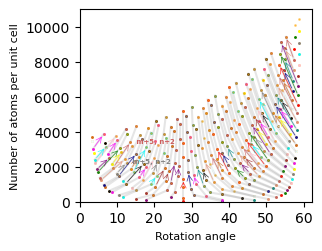

In [19]:
import matplotlib.pyplot as plt
import math
import numpy as np
from itertools import cycle, islice


fig, ax = plt.subplots(figsize=(3.0, 2.5))

for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if abs_diff % 3 != 0:
                if n < 31 and m < 31:
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2)
                #    ax.scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='blue')
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    ax.scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='orange', alpha=0.5)
                    orange_points.add((np.degrees(alpha), N))
                    nm_list = [(s + 5, s + 2) for s in range(0, 28)] + [(s + 4, 1) for s in range(0, 82, 3)] + [(s + 4, 2) for s in range(4, 82, 3)]+[(s +6, s) for s in range(5, 82, 3)]
                    colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))
                    for i in range(len(nm_list)):
                        if m == nm_list[i][0] and n == nm_list[i][1]:
                            m2 = m
                            n2 = n
                            color = colors[i]
                            x_values = []
                            y_values = []
                            for m1 in range(0, 91):
                                for n1 in range(0, 91):
                                    if m1 == m2 and n1 == n2:
                                        cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                        alpha2 = math.acos(cosalpha2)
                                        N2 = 4 * (n2**2 + m2*n2 + m2**2) / 3
                                        point_to_plot = (np.degrees(alpha2), N2)
                                        if point_to_plot in orange_points:
                                            ax.scatter(point_to_plot[0], point_to_plot[1], s=1, label=f'{m},{n}', color=color)
                                            x_values.append(point_to_plot[0])
                                            y_values.append(point_to_plot[1])
                                            
                                        m2 = m2 + 5
                                        n2 = n2 + 2
                            ax.plot(x_values, y_values, label=f'{m},{n}', color='grey',alpha= 0.2)

                            arrow_index = len(x_values) // 2  # Change this to adjust arrow position
                            ax.annotate('', xy=(x_values[arrow_index], y_values[arrow_index]),
                                        xytext=(x_values[arrow_index - 1], y_values[arrow_index - 1]),
                                        arrowprops=dict(arrowstyle='->', color=color, lw=0.5, alpha = 0.8))

                            if n == 17:
                                
                                ax.annotate(r' m+5, n+2', xy=(x_values[arrow_index], y_values[arrow_index]),
                                            xytext=(x_values[arrow_index] +1, y_values[arrow_index] - 100),
                                            ha='left', va='bottom', color=color, fontsize=5, weight='bold')

ax.set_xticks([0, 10, 20, 30, 40, 50, 60])                     
ax.set_xlabel('Rotation angle', fontsize=8)
ax.set_ylabel('Number of atoms per unit cell', fontsize=8)
                                                   
ax.set_ylim(bottom=0, top=11000)  # Adjust the values according to your requirements

#plt.show()
plt.savefig('figure17.png', dpi=300, bbox_inches='tight')

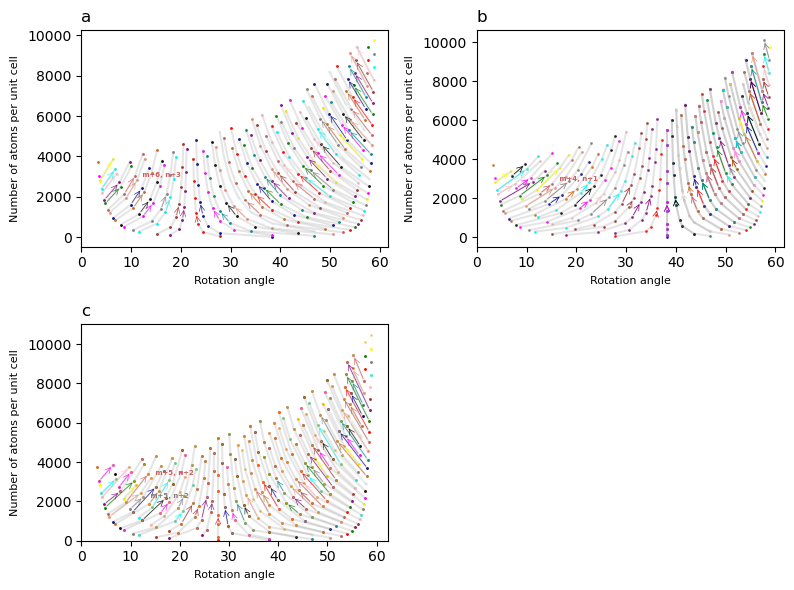

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import math
from itertools import cycle, islice

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Remove the empty fourth subplot
fig.delaxes(axs[1, 1])

# Flatten the axs array for easy indexing
axs = axs.flatten()


for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if abs_diff % 3 != 0:
                if n < 31 and m < 31:
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2)
                #    axs[0].scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='blue')
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    #axs[0].scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='orange', alpha=0.5)
                    orange_points.add((np.degrees(alpha), N))
                    nm_list = [(s + 5, s + 2) for s in range(0, 28)] + [(s + 4, 1) for s in range(0, 82, 3)] + [(s + 4, 2) for s in range(4, 82, 3)]
                    colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))
                    for i in range(len(nm_list)):
                        if m == nm_list[i][0] and n == nm_list[i][1]:
                            m2 = m
                            n2 = n
                            color = colors[i]
                            x_values = []
                            y_values = []
                            for m1 in range(0, 91):
                                for n1 in range(0, 91):
                                    if m1 == m2 and n1 == n2:
                                        cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                        alpha2 = math.acos(cosalpha2)
                                        N2 = 4 * (n2**2 + m2*n2 + m2**2) / 3
                                        point_to_plot = (np.degrees(alpha2), N2)
                                        if point_to_plot in orange_points:
                                            axs[0].scatter(point_to_plot[0], point_to_plot[1], s=1, label=f'{m},{n}', color=color)
                                            x_values.append(point_to_plot[0])
                                            y_values.append(point_to_plot[1])
                                            
                                        m2 = m2 + 6
                                        n2 = n2 + 3
                            axs[0].plot(x_values, y_values, label=f'{m},{n}', color='grey',alpha= 0.2)

                            arrow_index = len(x_values) // 2  # Change this to adjust arrow position
                            axs[0].annotate('', xy=(x_values[arrow_index], y_values[arrow_index]),
                                        xytext=(x_values[arrow_index - 1], y_values[arrow_index - 1]),
                                        arrowprops=dict(arrowstyle='->', color=color, lw=0.5, alpha = 0.8))

                            if n == 17:
                                
                                axs[0].annotate(r' m+6, n+3', xy=(x_values[arrow_index], y_values[arrow_index]),
                                            xytext=(x_values[arrow_index] +1, y_values[arrow_index] - 100),
                                            ha='left', va='bottom', color=color, fontsize=5, weight='bold')

for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if abs_diff % 3 != 0:
                if n < 31 and m < 31:
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2)
                #    axs[1].scatter(np.degrees(alpha), N, s=5, label=f'{m},{n}', color='blue')
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    #axs[1].scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='orange', alpha=0.5)
                    orange_points.add((np.degrees(alpha), N))
                    
                    nm_list = [(s + 5, s + 2) for s in range(0, 28)] + [(s + 4, 1) for s in range(0, 82, 3)] + [(s + 4, 2) for s in range(4, 82, 3)]+ [(s + 3, s - 3) for s in range(7, 31, 3)] 
                    
                    colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))
                    for i in range(len(nm_list)):
                        if m == nm_list[i][0] and n == nm_list[i][1]:
                            m2 = m
                            n2 = n
                            color = colors[i]
                            x_values = []
                            y_values = []
                            for m1 in range(0, 91):
                                for n1 in range(0, 91):
                                    if m1 == m2 and n1 == n2:
                                        cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                        alpha2 = math.acos(cosalpha2)
                                        N2 = 4 * (n2**2 + m2*n2 + m2**2) / 3
                                        point_to_plot = (np.degrees(alpha2), N2)
                                        if point_to_plot in orange_points:
                                            axs[1].scatter(point_to_plot[0], point_to_plot[1], s=1, label=f'{m},{n}', color=color, alpha = 0.8)
                                            x_values.append(point_to_plot[0])
                                            y_values.append(point_to_plot[1])
                                            
                                        m2 = m2 + 4
                                        n2 = n2 + 1
                            axs[1].plot(x_values, y_values, label=f'{m},{n}', color='grey',alpha= 0.2)
                            arrow_index = len(x_values) // 2  # Change this to adjust arrow position
                            axs[1].annotate('', xy=(x_values[arrow_index], y_values[arrow_index]),
                                        xytext=(x_values[arrow_index - 1], y_values[arrow_index - 1]),
                                        arrowprops=dict(arrowstyle='->', color=color, lw=0.5))

                            if n == 17:
                                
                                axs[1].annotate(r' m+4, n+1', xy=(x_values[arrow_index], y_values[arrow_index]),
                                            xytext=(x_values[arrow_index] +1, y_values[arrow_index]+100 ),
                                            ha='left', va='bottom', color=color, fontsize=5, weight='bold')




for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if abs_diff % 3 != 0:
                if n < 31 and m < 31:
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2)
                #    axs[2].scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='blue')
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    axs[2].scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='orange', alpha=0.5)
                    orange_points.add((np.degrees(alpha), N))
                    nm_list = [(s + 5, s + 2) for s in range(0, 28)] + [(s + 4, 1) for s in range(0, 82, 3)] + [(s + 4, 2) for s in range(4, 82, 3)]+[(s +6, s) for s in range(5, 82, 3)]
                    colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))
                    for i in range(len(nm_list)):
                        if m == nm_list[i][0] and n == nm_list[i][1]:
                            m2 = m
                            n2 = n
                            color = colors[i]
                            x_values = []
                            y_values = []
                            for m1 in range(0, 91):
                                for n1 in range(0, 91):
                                    if m1 == m2 and n1 == n2:
                                        cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                        alpha2 = math.acos(cosalpha2)
                                        N2 = 4 * (n2**2 + m2*n2 + m2**2) / 3
                                        point_to_plot = (np.degrees(alpha2), N2)
                                        if point_to_plot in orange_points:
                                            axs[2].scatter(point_to_plot[0], point_to_plot[1], s=1, label=f'{m},{n}', color=color)
                                            x_values.append(point_to_plot[0])
                                            y_values.append(point_to_plot[1])
                                            
                                        m2 = m2 + 5
                                        n2 = n2 + 2
                            axs[2].plot(x_values, y_values, label=f'{m},{n}', color='grey',alpha= 0.2)

                            arrow_index = len(x_values) // 2  # Change this to adjust arrow position
                            axs[2].annotate('', xy=(x_values[arrow_index], y_values[arrow_index]),
                                        xytext=(x_values[arrow_index - 1], y_values[arrow_index - 1]),
                                        arrowprops=dict(arrowstyle='->', color=color, lw=0.5, alpha = 0.8))

                            if n == 17:
                                
                                axs[2].annotate(r' m+5, n+2', xy=(x_values[arrow_index], y_values[arrow_index]),
                                            xytext=(x_values[arrow_index] +1, y_values[arrow_index] - 100),
                                            ha='left', va='bottom', color=color, fontsize=5, weight='bold')






axs[2].set_xticks([0, 10, 20, 30, 40, 50, 60])                     
axs[2].set_xlabel('Rotation angle', fontsize=8)
axs[2].set_ylabel('Number of atoms per unit cell', fontsize=8)
axs[1].set_xticks([0, 10, 20, 30, 40, 50, 60])                     
axs[1].set_xlabel('Rotation angle', fontsize=8)
axs[1].set_ylabel('Number of atoms per unit cell', fontsize=8)
axs[0].set_xticks([0, 10, 20, 30, 40, 50, 60])                     
axs[0].set_xlabel('Rotation angle', fontsize=8)
axs[0].set_ylabel('Number of atoms per unit cell', fontsize=8)

                                                   
axs[2].set_ylim(bottom=0, top=11000)                             
axs[0].yaxis.set_label_coords(-0.2, 0.5)
axs[0].set_title('a', loc='left')                           
axs[1].yaxis.set_label_coords(-0.2, 0.5)
axs[1].set_title('b', loc='left')                           
axs[2].yaxis.set_label_coords(-0.2, 0.5)
axs[2].set_title('c', loc='left')
# Adjust layout
plt.tight_layout(h_pad=1.3, w_pad=1.5)
plt.savefig('Report- figure18.png', dpi=300, bbox_inches='tight')


## both

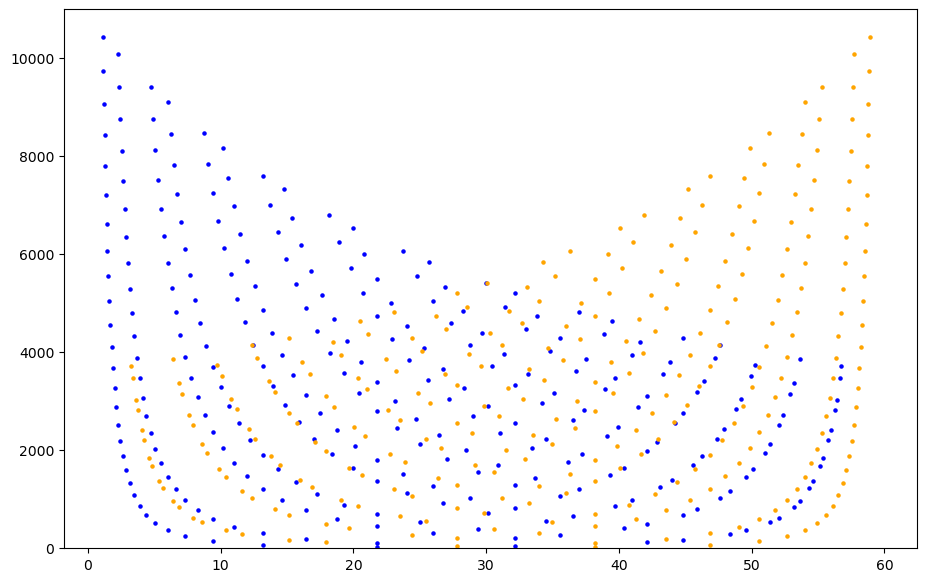

In [83]:
import matplotlib.pyplot as plt
import math
import numpy as np

fig, ax = plt.subplots(figsize=(11, 7))

for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if abs_diff % 3 != 0:
                if n < 31 and m < 31:
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2)
                    ax.scatter(np.degrees(alpha), N, s=5, label=f'{m},{n}',color = 'blue')
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    ax.scatter(np.degrees(alpha), N, s=5, label=f'{m},{n}',color = 'orange')
# Adding legend for scatter points
#ax.legend()
ax.set_ylim(bottom=0, top=11000)  # Adjust the values according to your requirements

plt.show()

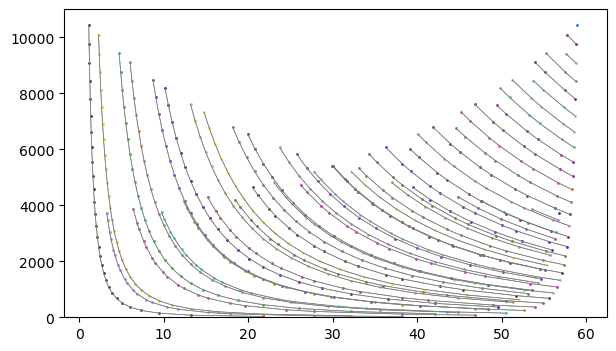

In [69]:
import matplotlib.pyplot as plt
import math
import numpy as np

fig, ax = plt.subplots(figsize=(7, 4))

# Dictionary to store colors for each abs_diff value
abs_diff_colors = {}

# Dictionary to store points for each abs_diff value
abs_diff_points = {}

for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)

            # Check if a color is assigned for this abs_diff value
            if abs_diff not in abs_diff_colors:
                # Assign a new darkened color if not already assigned
                base_color = np.random.rand(3)
                darkened_color = tuple(min(1.0, c * 1.0) for c in base_color)
                abs_diff_colors[abs_diff] = darkened_color

                # Initialize the list of points for this abs_diff value
                abs_diff_points[abs_diff] = []

            color = abs_diff_colors[abs_diff]

            if abs_diff % 3 != 0:
                if n < 31 and m < 31:
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2)
                    ax.scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color=color)
                    abs_diff_points[abs_diff].append((np.degrees(alpha), N))
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    ax.scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color=color)
                    abs_diff_points[abs_diff].append((np.degrees(alpha), N))

# Plot curves connecting points with the same abs_diff value
for points_list in abs_diff_points.values():
    if len(points_list) > 1:
        points_list = sorted(points_list, key=lambda x: x[0])
        x_values, y_values = zip(*points_list)
        ax.plot(x_values, y_values, color='gray', linestyle='-', linewidth=0.5)

for abs_diff, points_list in abs_diff_points.items():
    if len(points_list) > 1 and abs_diff <= 87:
        points_list = sorted(points_list, key=lambda x: x[0])
        x_values, y_values = zip(*points_list)
        ax.plot(x_values, y_values, color='gray', linestyle='-', linewidth=0.5)

# Adding custom horizontal legend for up to 87 value
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=5, label=f'|m-n|={diff}')
           for diff, color in abs_diff_colors.items() if diff <= 87]

# Manually create a custom horizontal legend with two colors next to each other
#legend = ax.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), ncol=3)
ax.set_ylim(bottom=0, top=11000)
plt.savefig('figure19.png', dpi=300, bbox_inches='tight')

In [6]:
blue_points= set()

(0.0, 11000.0)

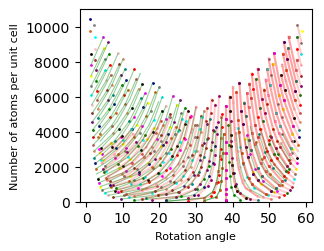

In [37]:
import matplotlib.pyplot as plt
import math
import numpy as np
from itertools import cycle, islice


fig, ax = plt.subplots(figsize=(3.0, 2.5))

for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if abs_diff % 3 != 0:
                if n < 31 and m < 31:
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2)
              
                blue_points.add((np.degrees(alpha), N))
                nm_list = [(s + 1, s) for s in range(1, 30)] + [(s + 1, 1) for s in range(0, 30)] + [(s + 3, s+1) for s in range(0, 30)]  
                
                
                colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))

                for i in range(len(nm_list)):
                    if m == nm_list[i][0] and n == nm_list[i][1]:
                        m2 = m
                        n2 = n
                        color = colors[i]
                        x_values = []
                        y_values = []

                        for m1 in range(0, 31):
                            for n1 in range(0, 31):
                                if m1 == m2 and n1 == n2:
                                    
                                    cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                    alpha2 = math.acos(cosalpha2)
                                    N2 = 4 * (n2**2 + m2*n2 + m2**2) 
                                    point_to_plot = (np.degrees(alpha2), N2)
                                    if point_to_plot in blue_points:
                                        ax.scatter(point_to_plot[0], point_to_plot[1], s=1, label=f'{m},{n}', color=color)
                                        x_values.append(point_to_plot[0])
                                        y_values.append(point_to_plot[1])
                                    m2 = m2 + 4
                                    n2 = n2 + 1

                        ax.plot(x_values, y_values, label=f'{m},{n}', color='green',alpha= 0.4, lw = 0.8)

                        
                        
                                
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    #ax.scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='orange', alpha=0.5)
                    orange_points.add((np.degrees(alpha), N))
                    nm_list = [(s + 5, s + 2) for s in range(0, 28)] + [(s + 4, 1) for s in range(0, 82, 3)] + [(s + 4, 2) for s in range(4, 82, 3)]+ [(s + 3, s - 3) for s in range(7, 31, 3)] 
                    
                    
                    colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))
                    for i in range(len(nm_list)):
                        if m == nm_list[i][0] and n == nm_list[i][1]:
                            m2 = m
                            n2 = n
                            color = colors[i]
                            x_values = []
                            y_values = []
                            for m1 in range(0, 91):
                                for n1 in range(0, 91):
                                    if m1 == m2 and n1 == n2:
                                        cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                        alpha2 = math.acos(cosalpha2)
                                        N2 = 4 * (n2**2 + m2*n2 + m2**2) / 3
                                        point_to_plot = (np.degrees(alpha2), N2)
                                        if point_to_plot in orange_points:
                                            ax.scatter(point_to_plot[0], point_to_plot[1], s=1, label=f'{m},{n}', color=color)
                                            x_values.append(point_to_plot[0])
                                            y_values.append(point_to_plot[1])
                                            
                                        m2 = m2 + 4
                                        n2 = n2 + 1
                            ax.plot(x_values, y_values, label=f'{m},{n}', color='red',alpha= 0.2)

ax.set_xticks([0, 10, 20, 30, 40, 50, 60])                     
ax.set_xlabel('Rotation angle', fontsize=8)
ax.set_ylabel('Number of atoms per unit cell', fontsize=8)
                                                   
ax.set_ylim(bottom=0, top=11000)  # Adjust the values according to your requirements

#plt.show()
#plt.savefig('figure15.png', dpi=300, bbox_inches='tight')

(0.0, 11000.0)

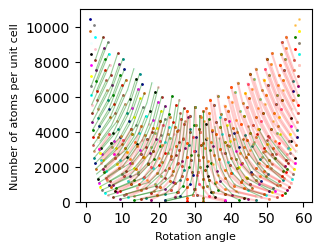

In [31]:
fig, ax = plt.subplots(figsize=(3.0, 2.5))



for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if m<31 and n<31 and abs_diff % 3 != 0:
                
                cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                alpha = math.acos(cosalpha)
                N = 4 * (n**2 + m*n + m**2)
                
                #ax.scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}',color = 'blue',alpha = 0.2)
                
                orange_points.add((np.degrees(alpha), N))

                
                nm_list = [(s + 1, s) for s in range(1, 30)] + [(s + 1, 1) for s in range(0, 30)] + [(s + 3, s+1) for s in range(0, 30)] + [(s , 2) for s in range(7, 30, 3)] 
                
                
                colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))

                for i in range(len(nm_list)):
                    if m == nm_list[i][0] and n == nm_list[i][1]:
                        m2 = m
                        n2 = n
                        color = colors[i]
                        x_values = []
                        y_values = []

                        for m1 in range(0, 31):
                            for n1 in range(0, 31):
                                if m1 == m2 and n1 == n2:
                                    
                                    cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                    alpha2 = math.acos(cosalpha2)
                                    N2 = 4 * (n2**2 + m2*n2 + m2**2) 
                                    point_to_plot = (np.degrees(alpha2), N2)
                                    if point_to_plot in orange_points:
                                        ax.scatter(point_to_plot[0], point_to_plot[1], s=1, label=f'{m},{n}', color=color)
                                        x_values.append(point_to_plot[0])
                                        y_values.append(point_to_plot[1])
                                    m2 = m2 + 3
                                    n2 = n2 + 1

                        ax.plot(x_values, y_values, label=f'{m},{n}', color='green',alpha= 0.4, lw = 0.8)

                                                 #    ax.scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='blue')
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    ax.scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='orange', alpha=0.5)
                    orange_points.add((np.degrees(alpha), N))
                    nm_list = [(s + 5, s + 2) for s in range(0, 28)] + [(s + 4, 1) for s in range(0, 82, 3)] + [(s + 4, 2) for s in range(4, 82, 3)]+[(s +6, s) for s in range(5, 82, 3)]
                    colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))
                    for i in range(len(nm_list)):
                        if m == nm_list[i][0] and n == nm_list[i][1]:
                            m2 = m
                            n2 = n
                            color = colors[i]
                            x_values = []
                            y_values = []
                            for m1 in range(0, 91):
                                for n1 in range(0, 91):
                                    if m1 == m2 and n1 == n2:
                                        cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                        alpha2 = math.acos(cosalpha2)
                                        N2 = 4 * (n2**2 + m2*n2 + m2**2) / 3
                                        point_to_plot = (np.degrees(alpha2), N2)
                                        if point_to_plot in orange_points:
                                            ax.scatter(point_to_plot[0], point_to_plot[1], s=1, label=f'{m},{n}', color=color)
                                            x_values.append(point_to_plot[0])
                                            y_values.append(point_to_plot[1])
                                            
                                        m2 = m2 + 5
                                        n2 = n2 + 2
                            ax.plot(x_values, y_values, label=f'{m},{n}', color='red',alpha= 0.2)


ax.set_xticks([0, 10, 20, 30, 40, 50, 60])                     
ax.set_xlabel('Rotation angle', fontsize=8)
ax.set_ylabel('Number of atoms per unit cell', fontsize=8)
                                                   
ax.set_ylim(bottom=0, top=11000)  # Adjust the values according to your requirements

#plt.show()
#plt.savefig('figure17.png', dpi=300, bbox_inches='tight')

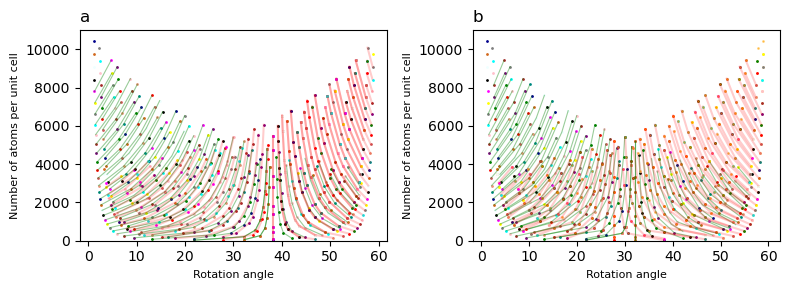

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.lines import Line2D

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3))  # Two subplots stacked vertically

for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if abs_diff % 3 != 0:
                if n < 31 and m < 31:
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2)
              
                blue_points.add((np.degrees(alpha), N))
                nm_list = [(s + 1, s) for s in range(1, 30)] + [(s + 1, 1) for s in range(0, 30)] + [(s + 3, s+1) for s in range(0, 30)]  
                
                
                colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))

                for i in range(len(nm_list)):
                    if m == nm_list[i][0] and n == nm_list[i][1]:
                        m2 = m
                        n2 = n
                        color = colors[i]
                        x_values = []
                        y_values = []

                        for m1 in range(0, 31):
                            for n1 in range(0, 31):
                                if m1 == m2 and n1 == n2:
                                    
                                    cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                    alpha2 = math.acos(cosalpha2)
                                    N2 = 4 * (n2**2 + m2*n2 + m2**2) 
                                    point_to_plot = (np.degrees(alpha2), N2)
                                    if point_to_plot in blue_points:
                                        ax1.scatter(point_to_plot[0], point_to_plot[1], s=1, label=f'{m},{n}', color=color)
                                        x_values.append(point_to_plot[0])
                                        y_values.append(point_to_plot[1])
                                    m2 = m2 + 4
                                    n2 = n2 + 1

                        ax1.plot(x_values, y_values, label=f'{m},{n}', color='green',alpha= 0.4, lw = 0.8)

                        
                        
                                
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    #ax1.scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='orange', alpha=0.5)
                    orange_points.add((np.degrees(alpha), N))
                    nm_list = [(s + 5, s + 2) for s in range(0, 28)] + [(s + 4, 1) for s in range(0, 82, 3)] + [(s + 4, 2) for s in range(4, 82, 3)]+ [(s + 3, s - 3) for s in range(7, 31, 3)] 
                    
                    
                    colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))
                    for i in range(len(nm_list)):
                        if m == nm_list[i][0] and n == nm_list[i][1]:
                            m2 = m
                            n2 = n
                            color = colors[i]
                            x_values = []
                            y_values = []
                            for m1 in range(0, 91):
                                for n1 in range(0, 91):
                                    if m1 == m2 and n1 == n2:
                                        cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                        alpha2 = math.acos(cosalpha2)
                                        N2 = 4 * (n2**2 + m2*n2 + m2**2) / 3
                                        point_to_plot = (np.degrees(alpha2), N2)
                                        if point_to_plot in orange_points:
                                            ax1.scatter(point_to_plot[0], point_to_plot[1], s=1, label=f'{m},{n}', color=color)
                                            x_values.append(point_to_plot[0])
                                            y_values.append(point_to_plot[1])
                                            
                                        m2 = m2 + 4
                                        n2 = n2 + 1
                            ax1.plot(x_values, y_values, label=f'{m},{n}', color='red',alpha= 0.2)

ax1.set_xticks([0, 10, 20, 30, 40, 50, 60])                     
ax1.set_xlabel('Rotation angle', fontsize=8)
ax1.set_ylabel('Number of atoms per unit cell', fontsize=8)
                                                   
ax1.set_ylim(bottom=0, top=11000)  # Adjust the values according to your requirements


for m in range(0, 201):
    for n in range(1, 201):
        if m > n:
            abs_diff = abs(m - n)
            if m<31 and n<31 and abs_diff % 3 != 0:
                
                cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                alpha = math.acos(cosalpha)
                N = 4 * (n**2 + m*n + m**2)
                
                #ax2.scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}',color = 'blue',alpha = 0.2)
                
                orange_points.add((np.degrees(alpha), N))

                
                nm_list = [(s + 1, s) for s in range(1, 30)] + [(s + 1, 1) for s in range(0, 30)] + [(s + 3, s+1) for s in range(0, 30)] + [(s , 2) for s in range(7, 30, 3)] 
                
                
                colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))

                for i in range(len(nm_list)):
                    if m == nm_list[i][0] and n == nm_list[i][1]:
                        m2 = m
                        n2 = n
                        color = colors[i]
                        x_values = []
                        y_values = []

                        for m1 in range(0, 31):
                            for n1 in range(0, 31):
                                if m1 == m2 and n1 == n2:
                                    
                                    cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                    alpha2 = math.acos(cosalpha2)
                                    N2 = 4 * (n2**2 + m2*n2 + m2**2) 
                                    point_to_plot = (np.degrees(alpha2), N2)
                                    if point_to_plot in orange_points:
                                        ax2.scatter(point_to_plot[0], point_to_plot[1], s=1, label=f'{m},{n}', color=color)
                                        x_values.append(point_to_plot[0])
                                        y_values.append(point_to_plot[1])
                                    m2 = m2 + 3
                                    n2 = n2 + 1

                        ax2.plot(x_values, y_values, label=f'{m},{n}', color='green',alpha= 0.4, lw = 0.8)

                                                 #    ax2.scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='blue')
            elif abs_diff % 3 == 0:
                if n % 3 == 0:
                    continue
                if m % 2 == 0:
                    max_n = 19 - (m - 52) // 2
                else:
                    max_n = 18 - (m - 51) // 2

                max_n = max(1, max_n)

                if n in range(0, max_n + 1):
                    cosalpha = (n**2 + 4*m*n + m**2) / (2*(n**2 + m*n + m**2))
                    alpha = math.acos(cosalpha)
                    N = 4 * (n**2 + m*n + m**2) / 3
                    ax2.scatter(np.degrees(alpha), N, s=1, label=f'{m},{n}', color='orange', alpha=0.5)
                    orange_points.add((np.degrees(alpha), N))
                    nm_list = [(s + 5, s + 2) for s in range(0, 28)] + [(s + 4, 1) for s in range(0, 82, 3)] + [(s + 4, 2) for s in range(4, 82, 3)]+[(s +6, s) for s in range(5, 82, 3)]
                    colors = list(islice(cycle(['red', 'green', 'purple', 'brown', 'pink', 'cyan', 'gray', 'yellow', 'magenta','k','azure','chocolate','darkblue','darkcyan','darksalmon','indianred']), len(nm_list)))
                    for i in range(len(nm_list)):
                        if m == nm_list[i][0] and n == nm_list[i][1]:
                            m2 = m
                            n2 = n
                            color = colors[i]
                            x_values = []
                            y_values = []
                            for m1 in range(0, 91):
                                for n1 in range(0, 91):
                                    if m1 == m2 and n1 == n2:
                                        cosalpha2 = (n2**2 + 4*m2*n2 + m2**2) / (2*(n2**2 + m2*n2 + m2**2))
                                        alpha2 = math.acos(cosalpha2)
                                        N2 = 4 * (n2**2 + m2*n2 + m2**2) / 3
                                        point_to_plot = (np.degrees(alpha2), N2)
                                        if point_to_plot in orange_points:
                                            ax2.scatter(point_to_plot[0], point_to_plot[1], s=1, label=f'{m},{n}', color=color)
                                            x_values.append(point_to_plot[0])
                                            y_values.append(point_to_plot[1])
                                            
                                        m2 = m2 + 5
                                        n2 = n2 + 2
                            ax2.plot(x_values, y_values, label=f'{m},{n}', color='red',alpha= 0.2)


ax2.set_xticks([0, 10, 20, 30, 40, 50, 60])                     
ax2.set_xlabel('Rotation angle', fontsize=8)
ax2.set_ylabel('Number of atoms per unit cell', fontsize=8)
ax1.set_title('a', loc='left')
ax2.set_title('b', loc='left')                                                
ax2.set_ylim(bottom=0, top=11000)  # Adjust the values according to your requirements
plt.tight_layout(h_pad=3)
# Show the plot
#plt.show()
plt.savefig('Report- figure19.png', dpi=300, bbox_inches='tight')